In [1]:
# 1. Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pickle

In [2]:
# 2. Load Data
df = pd.read_csv("../dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
# 🧹 3. Data Cleaning
# Remove whitespace from TotalCharges and convert to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'].replace(" ", np.nan))

In [4]:
# Drop rows with missing TotalCharges
df.dropna(inplace=True)

In [5]:
# Drop customerID (not useful)
df.drop('customerID', axis=1, inplace=True)

In [6]:
# 📊 4. Exploratory Data Analysis

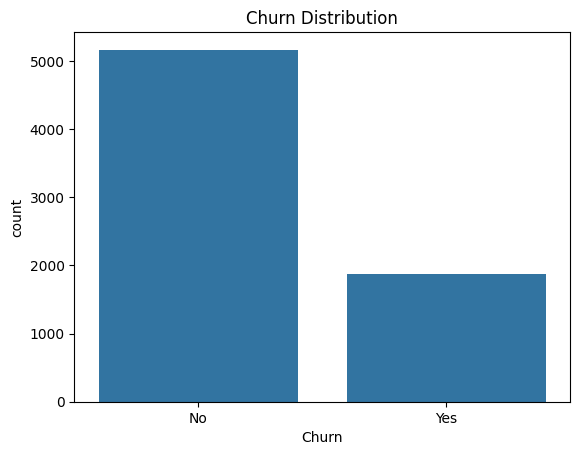

In [7]:
# Churn distribution
sns.countplot(x='Churn', data=df)
plt.title("Churn Distribution")
plt.show()

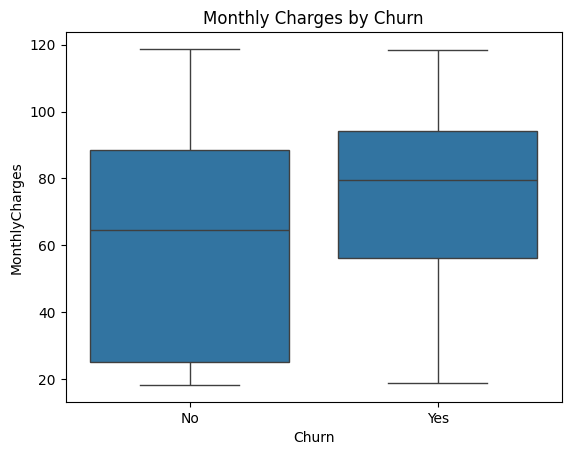

In [8]:
# Monthly Charges vs Churn
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title("Monthly Charges by Churn")
plt.show()

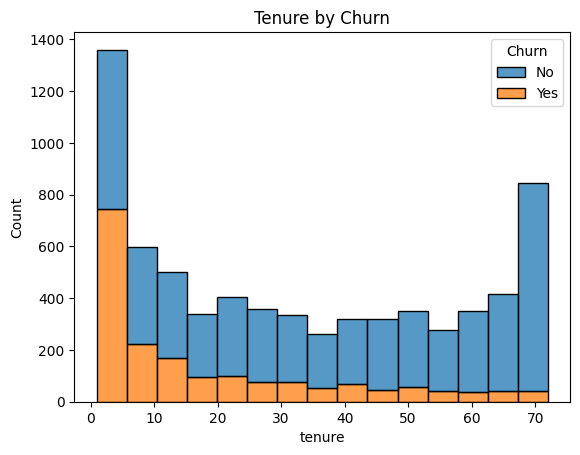

In [9]:
# Tenure vs Churn
sns.histplot(data=df, x='tenure', hue='Churn', multiple='stack')
plt.title("Tenure by Churn")
plt.show()

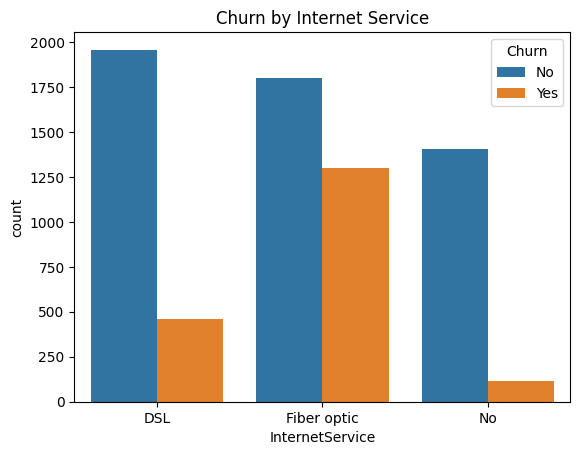

In [10]:
# Internet Service vs Churn
sns.countplot(data=df, x='InternetService', hue='Churn')
plt.title("Churn by Internet Service")
plt.show()

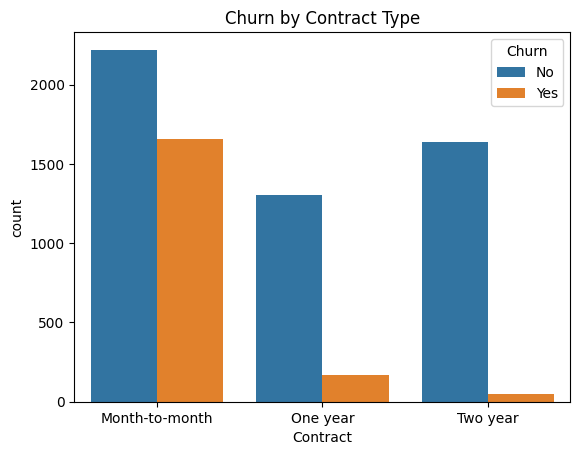

In [11]:
# Contract Type vs Churn
sns.countplot(data=df, x='Contract', hue='Churn')
plt.title("Churn by Contract Type")
plt.show()

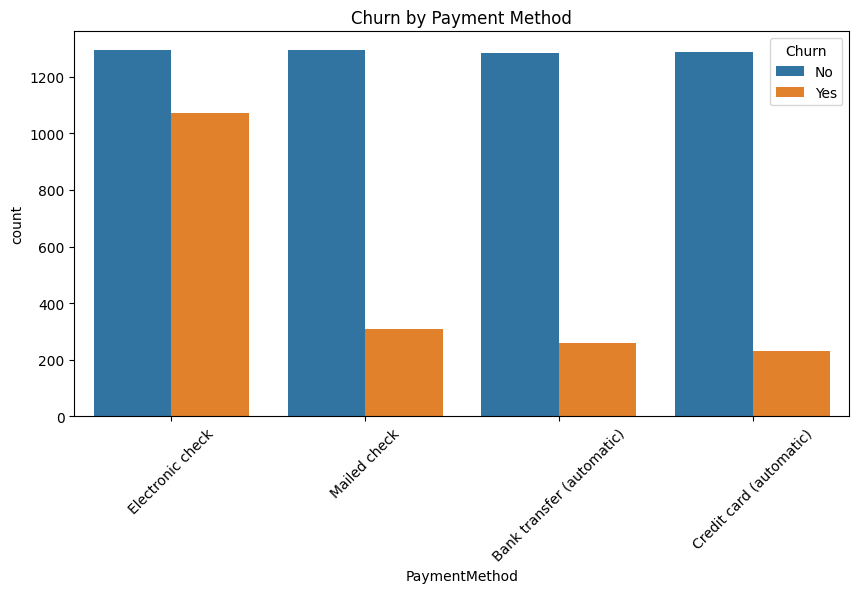

In [12]:
# Payment Method vs Churn
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='PaymentMethod', hue='Churn')
plt.title("Churn by Payment Method")
plt.xticks(rotation=45)
plt.show()

In [13]:
# Encode categorical columns for correlation heatmap
df_encoded = df.copy()
cat_cols = df_encoded.select_dtypes(include='object').columns
le = LabelEncoder()
for col in cat_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

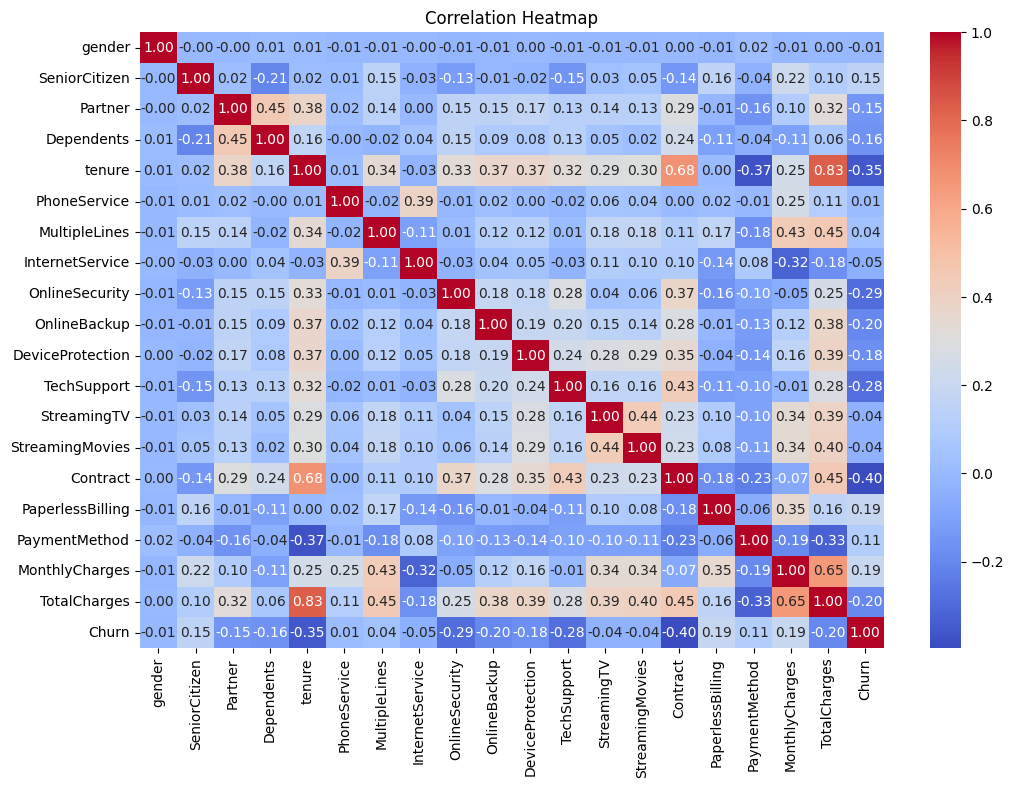

In [14]:
# Correlation heatmap (using encoded DataFrame)
plt.figure(figsize=(12, 8))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

In [15]:
# 🧪 6. Train-Test Preparation
# Encode original categorical columns for modeling
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [16]:
# Features and target
X = df.drop('Churn', axis=1)
y = df['Churn']


In [17]:
# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [18]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [19]:
# 📈 7. Model Training
# Logistic Regression
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
log_pred = log_model.predict(X_test)

In [20]:
# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

In [21]:
# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

In [22]:
# 📊 8. Evaluation
print("Logistic Regression Accuracy:", accuracy_score(y_test, log_pred))
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_pred))
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))

Logistic Regression Accuracy: 0.7853589196872779
Decision Tree Accuracy: 0.7263681592039801
Random Forest Accuracy: 0.7917555081734187


In [23]:
# Best model (example: logistic)
print(classification_report(y_test, log_pred))
print(confusion_matrix(y_test, log_pred))


              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.49      0.55       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.70      1407
weighted avg       0.77      0.79      0.78      1407

[[920 113]
 [189 185]]


In [24]:
# 💾 9. Save Model
with open("../Model/churn_model.pkl", "wb") as f:
    pickle.dump(log_model, f)

print("Model saved successfully.")


Model saved successfully.
